In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-trips-2019/taxi_zone_lookup.csv
/kaggle/input/new-york-city-taxi-trips-2019/data_dictionary.pdf
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-06.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-12.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-03.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-04.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-10.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-09.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-11.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-08.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-07.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-05.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-02.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-01.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/taxi_zones/taxi_zones.dbf
/kaggle/input/new-york-city-taxi-

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/new-york-city-taxi-trips-2019/taxi_zone_lookup.csv
/kaggle/input/new-york-city-taxi-trips-2019/data_dictionary.pdf
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-06.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-12.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-03.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-04.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-10.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-09.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-11.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-08.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-07.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-05.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-02.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-01.sqlite
/kaggle/input/new-york-city-taxi-trips-2019/taxi_zones/taxi_zones.dbf
/kaggle/input/new-york-city-taxi-

In [4]:
import sqlite3

conn = sqlite3.connect("/kaggle/input/new-york-city-taxi-trips-2019/2019/2019-01.sqlite")
trip_data_df = pd.read_sql_query("SELECT * FROM tripdata", conn)
conn.close()

In [5]:
trip_data_df.shape

(7667792, 18)

In [6]:
df = trip_data_df

In [7]:
trip_data_df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [8]:
trip_data_df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-01-01 00:46:40.000000,2019-01-01 00:53:20.000000,1.0,1.5,1.0,N,151.0,239.0,1.0,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1.0,2019-01-01 00:59:47.000000,2019-01-01 01:18:59.000000,1.0,2.6,1.0,N,239.0,246.0,1.0,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2.0,2018-12-21 13:48:30.000000,2018-12-21 13:52:40.000000,3.0,0.0,1.0,N,236.0,236.0,1.0,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2.0,2018-11-28 15:52:25.000000,2018-11-28 15:55:45.000000,5.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2.0,2018-11-28 15:56:57.000000,2018-11-28 15:58:33.000000,5.0,0.0,2.0,N,193.0,193.0,2.0,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [9]:
trip_data_df["congestion_surcharge"].value_counts()

congestion_surcharge
0.0    2811777
2.5         37
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendorid               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   ratecodeid             float64
 6   store_and_fwd_flag     object 
 7   pulocationid           float64
 8   dolocationid           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(15), object(3)
memory usage: 1.0+ GB


In [11]:
df.isnull().sum()

vendorid                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
ratecodeid                     0
store_and_fwd_flag             0
pulocationid                   0
dolocationid                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     4855978
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,7.667792e+06,2.811814e+06
mean,1.636775e+00,1.567078e+00,2.801084e+00,1.058371e+00,1.655009e+02,1.637529e+02,1.291776e+00,1.240941e+01,3.280394e-01,4.968458e-01,1.827367e+00,3.169187e-01,2.993382e-01,1.568222e+01,3.289691e-05
std,5.398204e-01,1.224431e+00,3.737529e+00,6.780889e-01,6.639180e+01,7.036445e+01,4.733229e-01,2.620721e+02,5.074789e-01,5.337843e-02,2.501213e+00,2.023665e+00,1.911711e-02,2.622932e+02,9.068695e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00


In [14]:
df["vendorid"].value_counts()

vendorid
2.0    4652191
1.0    2938778
4.0      76823
Name: count, dtype: int64

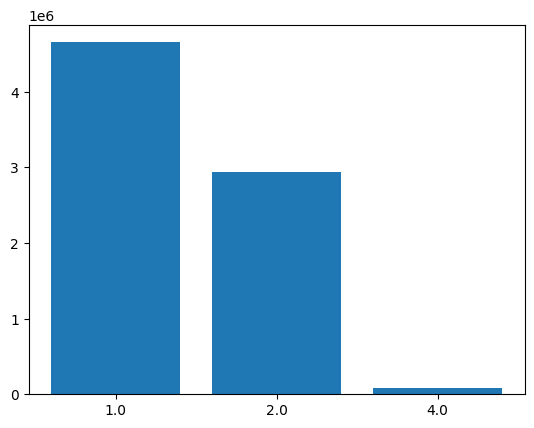

In [15]:
import matplotlib.pyplot as plt

# Get unique vendor IDs and their counts
unique_vendor_ids = df["vendorid"].unique()
vendor_counts = df["vendorid"].value_counts()

# Create a numeric range for the x-axis positions
x_positions = range(len(unique_vendor_ids))

# Plot the bar chart
plt.bar(x_positions, vendor_counts)

# Set x-axis tick labels
plt.xticks(x_positions, unique_vendor_ids)

# Show the plot
plt.show()


# Which vendor picked most passengers among all?

In [16]:
df.columns[3]

'passenger_count'

In [17]:
df["passenger_count"].value_counts()

passenger_count
1.0    5456121
2.0    1114106
5.0     323842
3.0     314721
6.0     200811
4.0     140753
0.0     117381
8.0         29
7.0         19
9.0          9
Name: count, dtype: int64

In [18]:
vendors_passengers = df.groupby("vendorid")["passenger_count"].sum()

In [19]:
vendors_passengers

vendorid
1.0    3536755.0
2.0    8400571.0
4.0      78704.0
Name: passenger_count, dtype: float64

<Axes: xlabel='vendorid'>

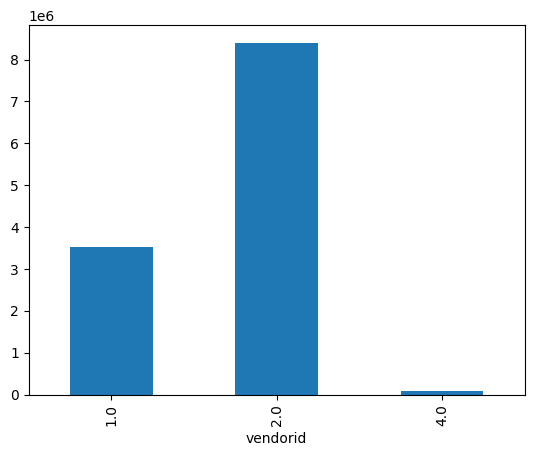

In [20]:
vendors_passengers.plot(kind="bar")

To conclude that although in first month, vendor id 1 ran more than comparison to others , the numbers of passengers that vendor 2 picked is more than double than of vendor 1 and among all vendor 4 picked less passengers since, it ran the least among three



In [21]:
df.columns[4]

'trip_distance'

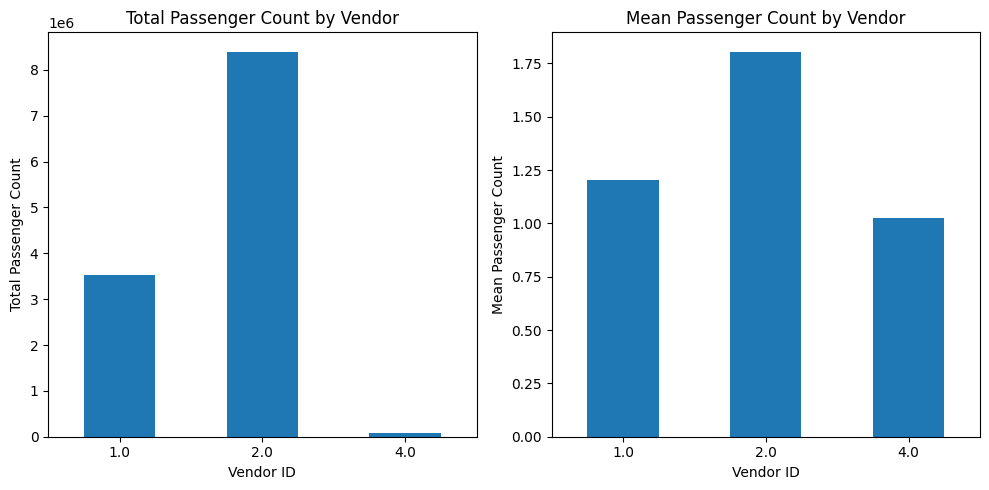

In [22]:
import pandas as pd

# Calculate total passenger count for each vendor
total_passenger_count_by_vendor = df.groupby('vendorid')['passenger_count'].sum()

# Calculate mean passenger count for each vendor
mean_passenger_count_by_vendor = df.groupby('vendorid')['passenger_count'].mean()

# Plotting total passenger count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
total_passenger_count_by_vendor.plot(kind='bar', rot=0)
plt.title('Total Passenger Count by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Total Passenger Count')

# Plotting mean passenger count
plt.subplot(1, 2, 2)
mean_passenger_count_by_vendor.plot(kind='bar', rot=0)
plt.title('Mean Passenger Count by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Mean Passenger Count')

plt.tight_layout()
plt.show()


In [23]:
passengers_trip = df.groupby("passenger_count")["trip_distance"].sum()

In [24]:
passengers_trip

passenger_count
0.0      311242.89
1.0    15163042.14
2.0     3209263.10
3.0      894027.42
4.0      401580.08
5.0      928047.43
6.0      570772.08
7.0          48.67
8.0          91.14
9.0          13.38
Name: trip_distance, dtype: float64